In [1]:
import numpy as np
import matplotlib.pyplot as plt # noqa
import ozzy as oz # noqa
import ozzy.fields as flds # noqa
import ozzy.plot as oplt # noqa
import xarray as xr

In [2]:
x = np.linspace(0,20,500)
xv, yv = np.meshgrid(x,x)

In [3]:
vert = np.sin(xv)
hor = np.sin(yv)
linvert = yv*np.sin(xv)
diag = np.sin(-xv-yv)
mult = np.sin(xv) - 0.1*np.exp(0.1*yv)*np.sin(xv-yv)

In [4]:
da = xr.DataArray(diag, coords={'t': x,'x1': x})

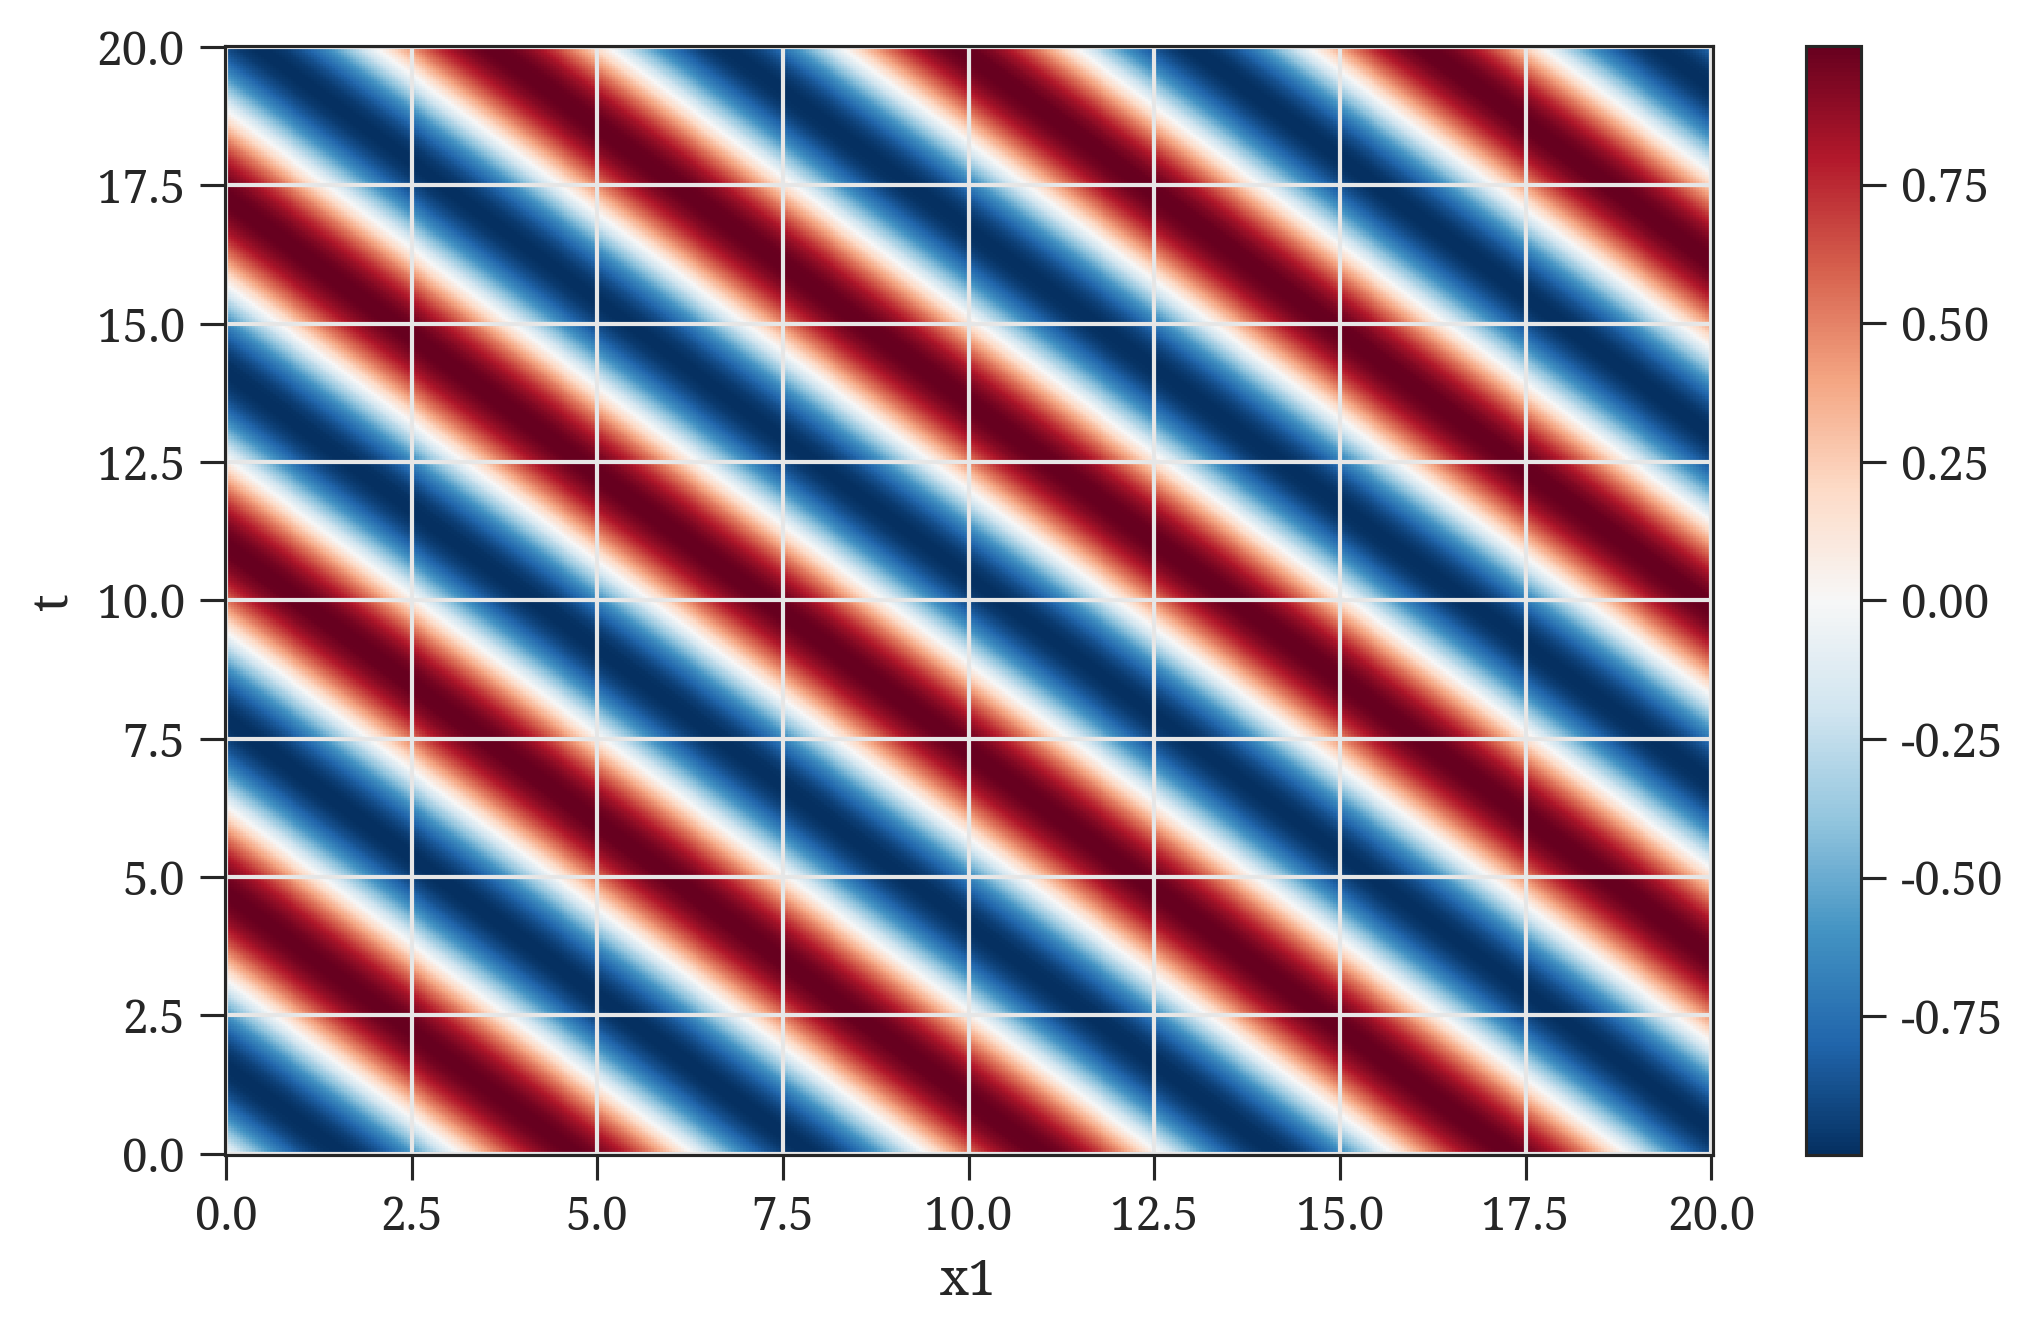

In [5]:
da.plot.imshow()

In [ ]:
vphi = flds.ave_vphi_from_waterfall(da, dcells=(3, 11))

In [ ]:
vphi.plot()

In [16]:
def _get_kaxis(axis, real=False):
    nx = axis.size
    dx = (axis[-1] - axis[0]) / nx

    if real:
        kaxis = np.fft.rfftfreq(nx, dx)
    else:
        kaxis = np.fft.fftshift(np.fft.fftfreq(nx, dx))
    return kaxis

In [74]:
dx = 11
dt = 3

xwin = x
twin = x

kx = _get_kaxis(xwin, real=True)
kt = _get_kaxis(twin)
Kx, Kt = np.meshgrid(kx, kt)
vphi_map = 1.0 - Kt / Kx
vphi_map[np.where(Kx == 0)] = 0

fftdata = abs(np.fft.fftshift(np.fft.rfft2(diag, norm='forward'), axes=0))
fftdata[np.where(Kx == 0)] = 0
factor = np.nansum(fftdata)
fftdata = fftdata / factor

vphi_all =  np.sum(fftdata * vphi_map)
vphi_all

/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/3908894541.py:10: RuntimeWarning: divide by zero encountered in divide
  vphi_map = 1.0 - Kt / Kx
/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/3908894541.py:10: RuntimeWarning: invalid value encountered in divide
  vphi_map = 1.0 - Kt / Kx


0.536572447393418

In [75]:
inds = np.where(fftdata == np.max(fftdata))
vphi_map[inds]

array([0.])

(-1.0, 1.0, -1.0, 1.0)

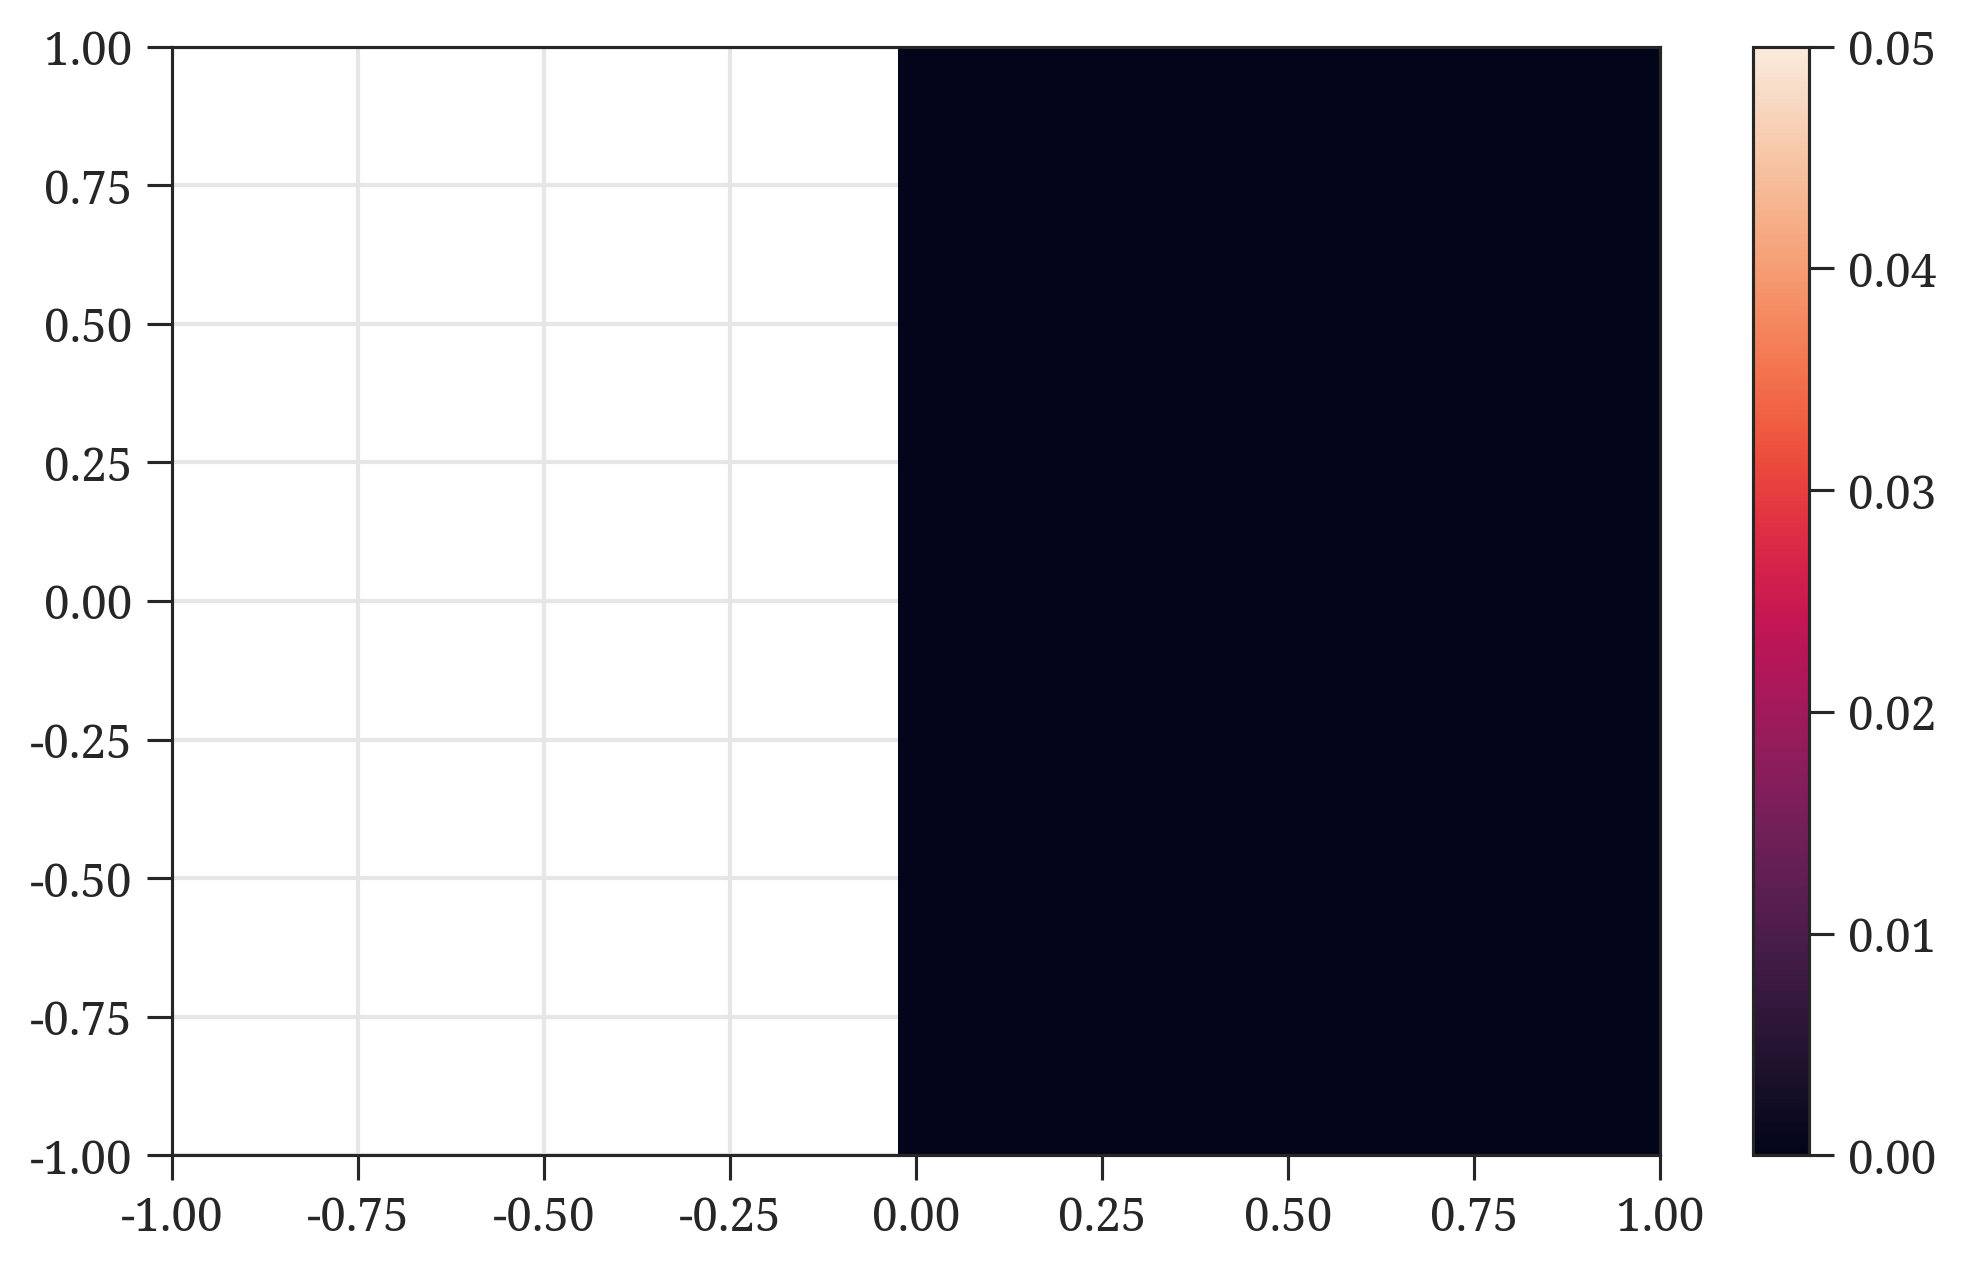

In [18]:
plt.pcolormesh(kx, kt, fftdata)
plt.colorbar()
plt.clim(0,0.05)
plt.axis((-1,1, -1, 1))


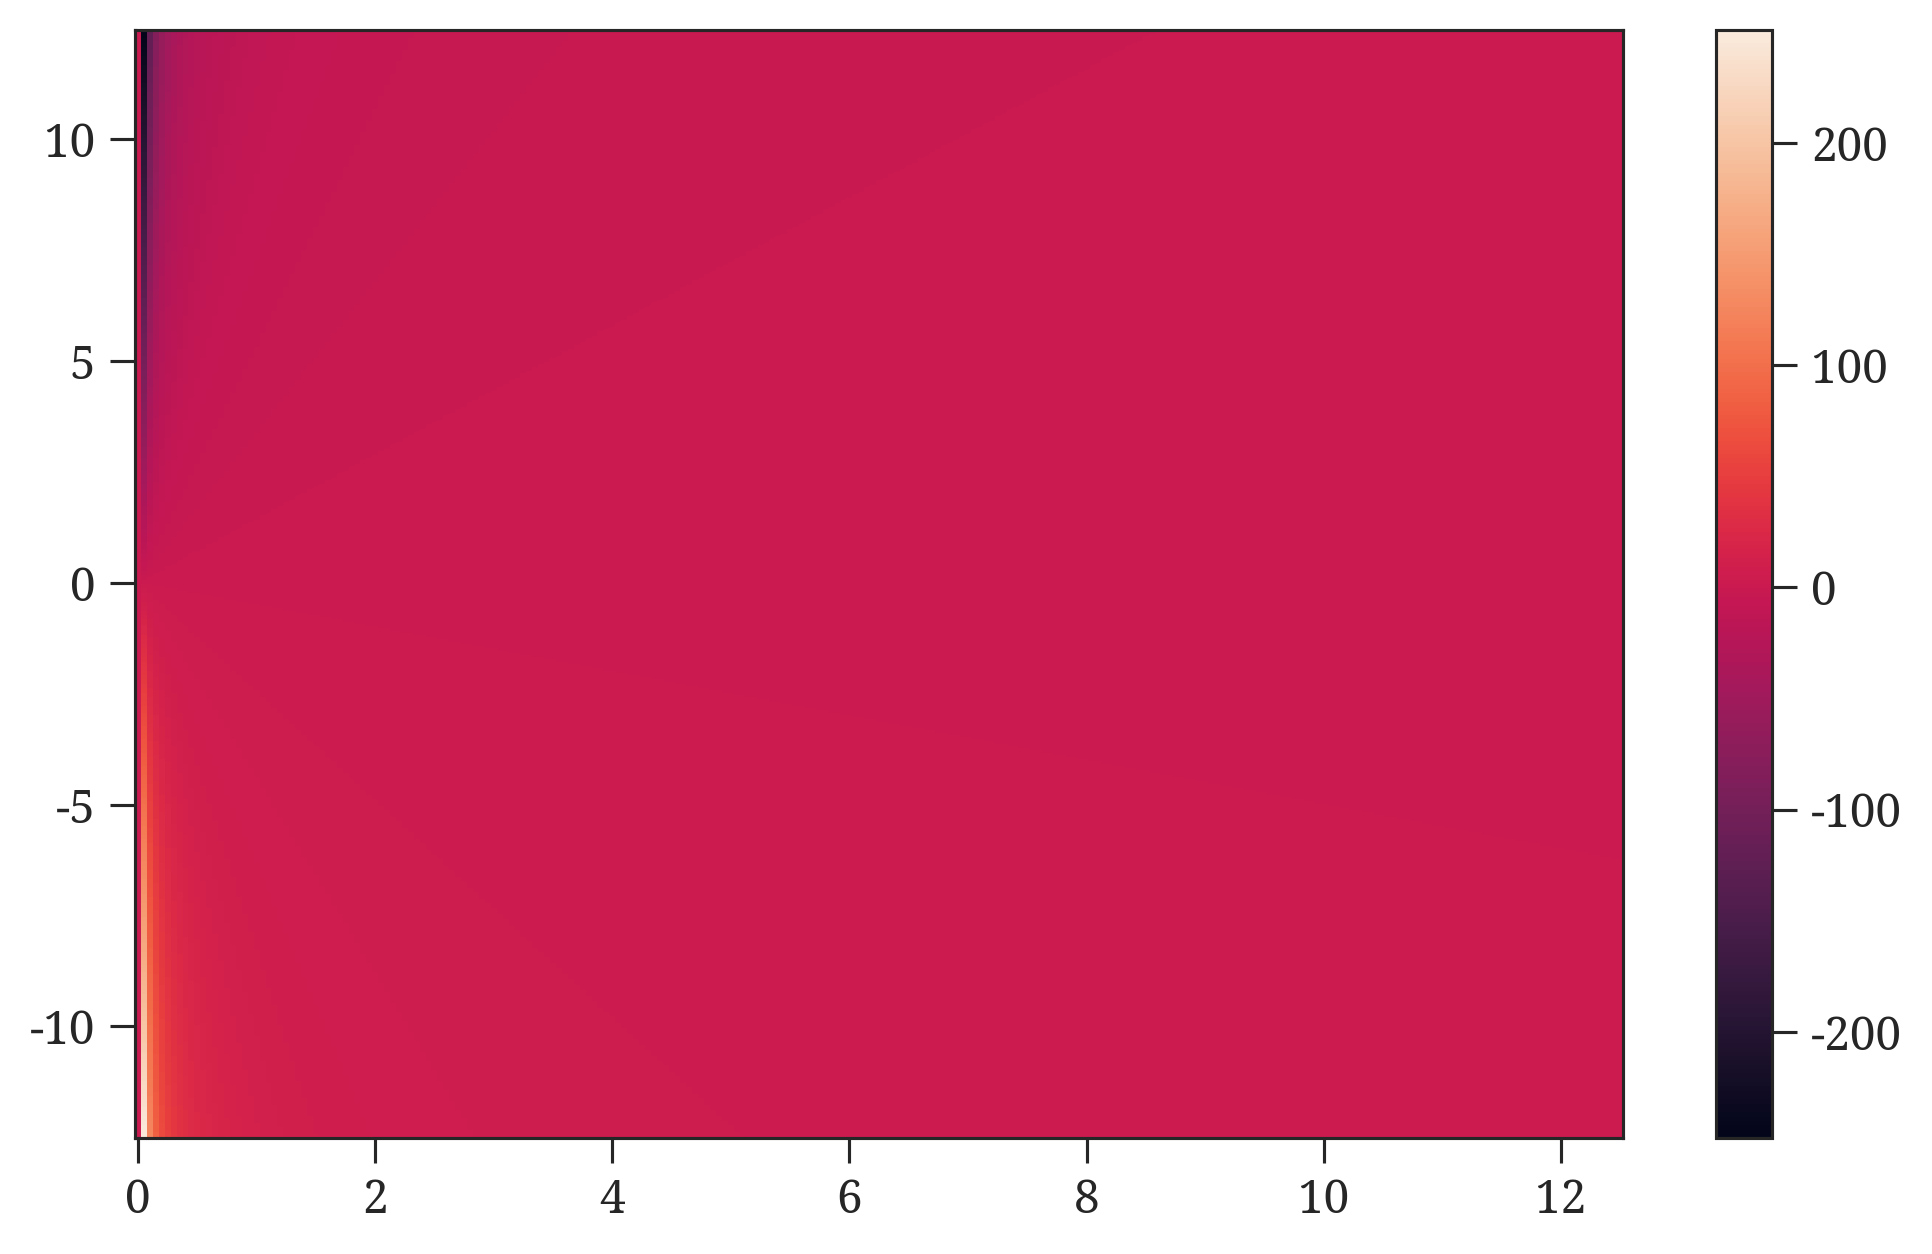

In [19]:
plt.pcolormesh(kx, kt, vphi_map)
plt.colorbar()

In [77]:
dx = 2*round(2*np.pi / (x[1]-x[0]))

# dx = 11
dt = x.size

xwin = x[0:dx]
twin = x[0:dt]

kx = _get_kaxis(xwin, real=True)
kt = _get_kaxis(twin)
Kx, Kt = np.meshgrid(kx, kt)
vphi_map = 1.0 - Kt / Kx
vphi_map[np.where(Kx == 0)] = 0


fftdata = abs(np.fft.fftshift(np.fft.rfft2(diag[0:dt,0:dx], norm='forward'), axes=0))
fftdata[np.where(Kx == 0)] = 0
factor = np.nansum(fftdata)
fftdata2 = fftdata / factor



vphi_all =  np.nansum(fftdata2 * vphi_map)
vphi_all

/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/2799077454.py:12: RuntimeWarning: divide by zero encountered in divide
  vphi_map = 1.0 - Kt / Kx
/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/2799077454.py:12: RuntimeWarning: invalid value encountered in divide
  vphi_map = 1.0 - Kt / Kx


0.22633439464170024

(-2.0, 2.0, -2.0, 2.0)

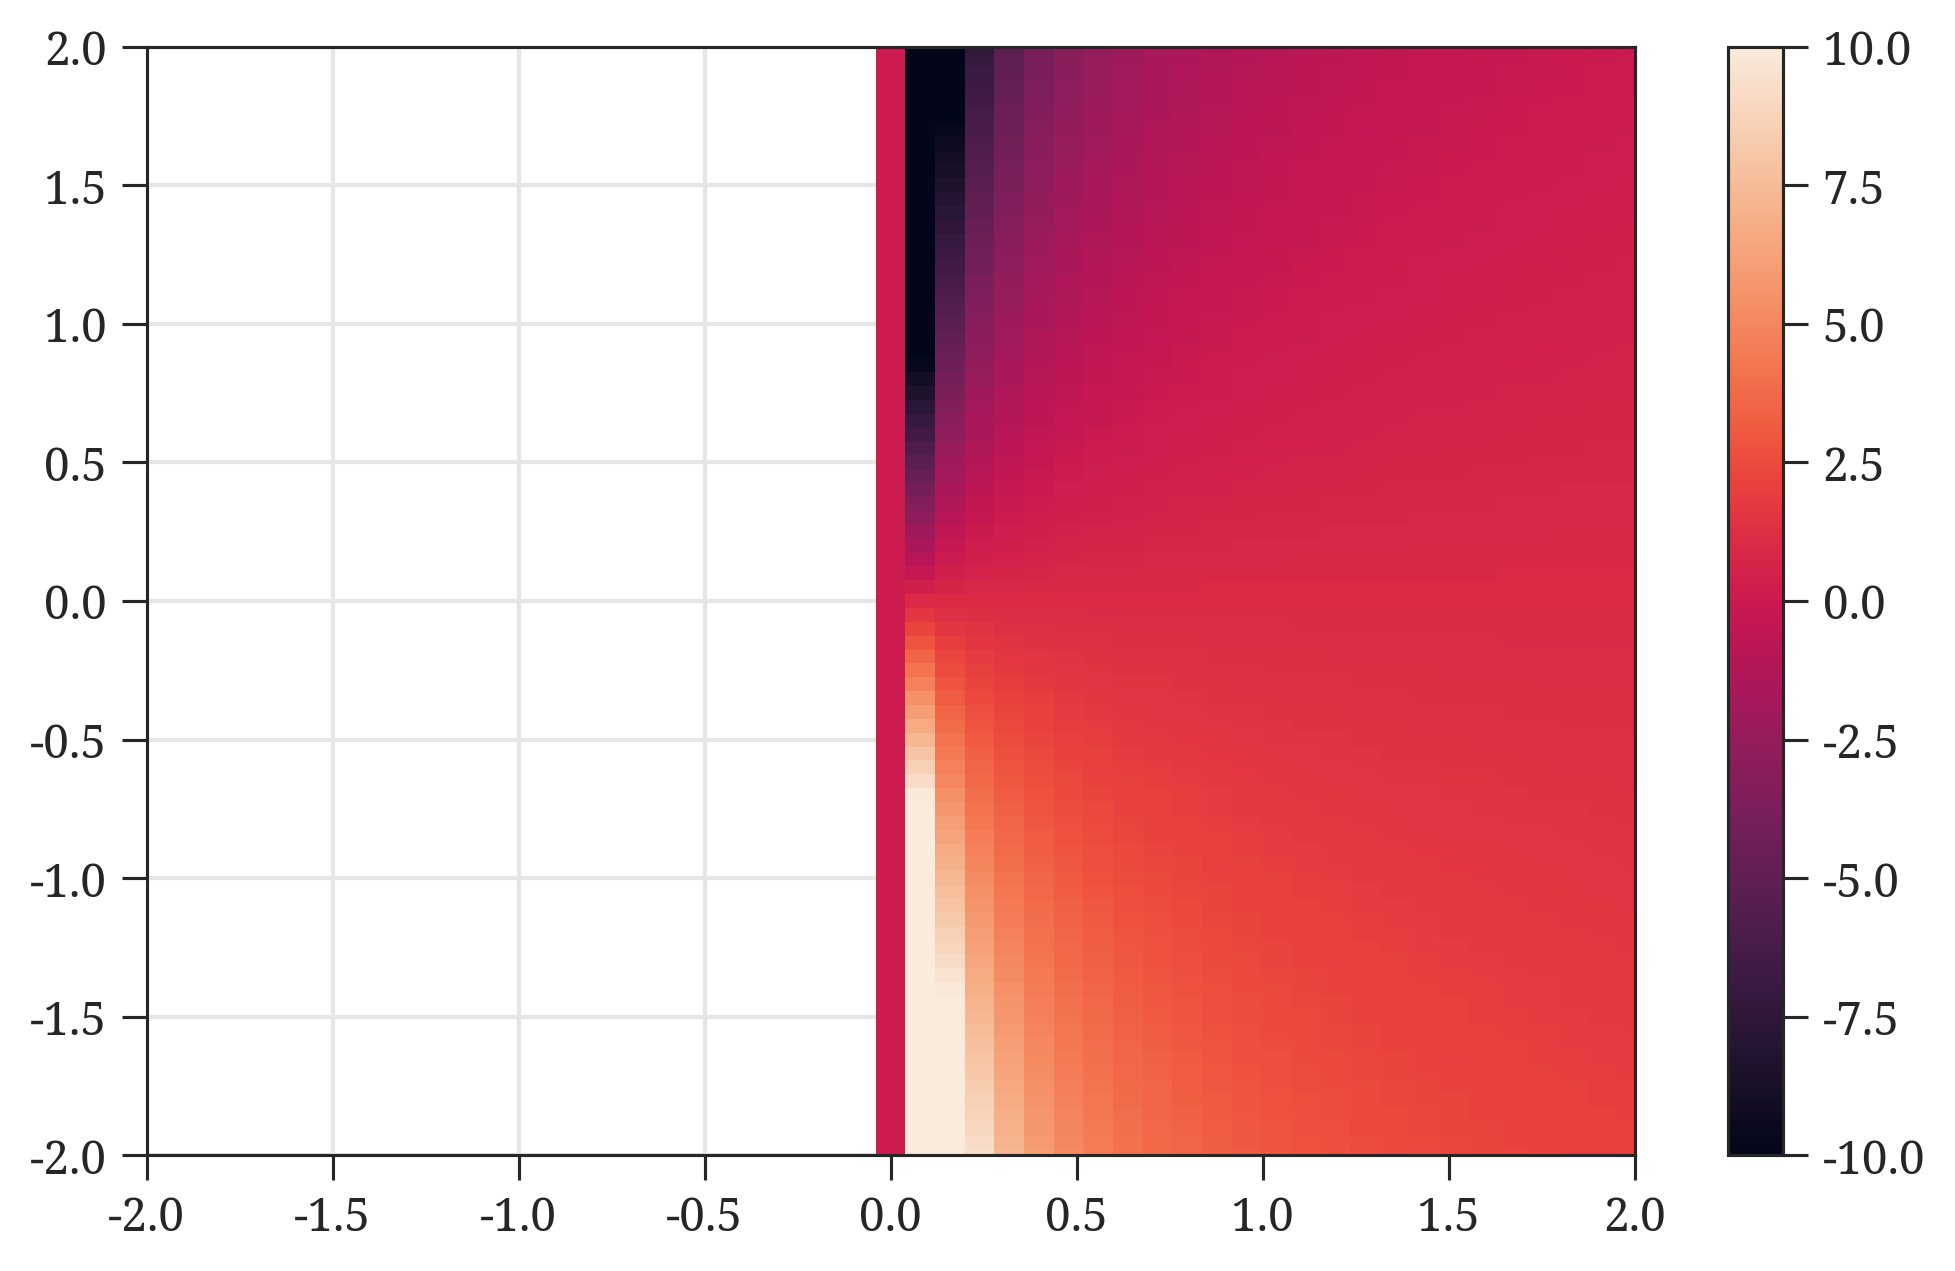

In [78]:
plt.pcolormesh(kx, kt, vphi_map)
plt.colorbar()
plt.clim(-10,10)
plt.axis((-2,2, -2, 2))

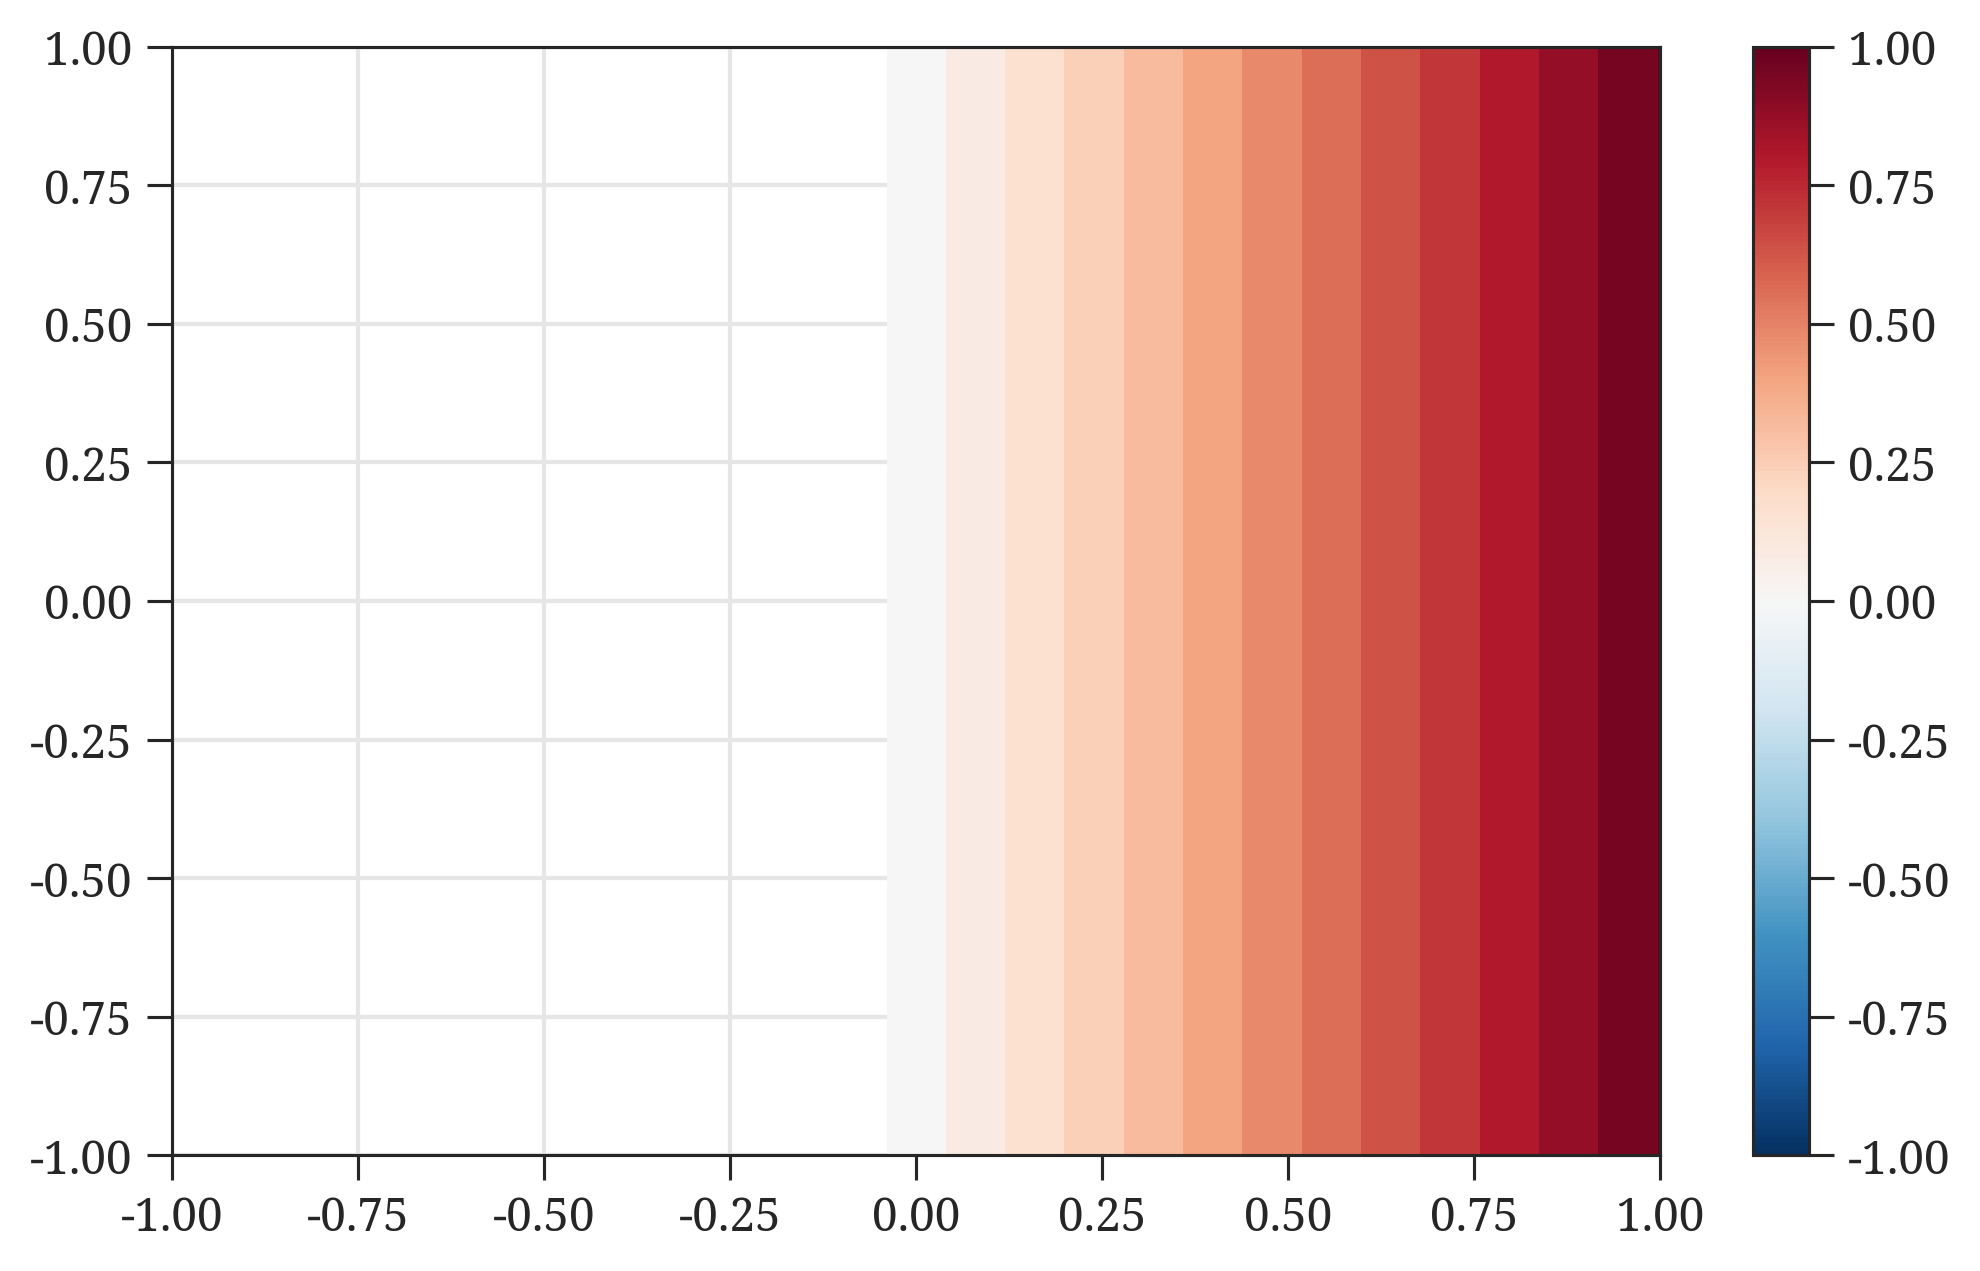

In [79]:
plt.pcolormesh(kx, kt, Kx, cmap='RdBu_r')
plt.axis((-1,1, -1, 1))
plt.colorbar()
plt.clim(-1,1)

(-1.0, 1.0, -1.0, 1.0)

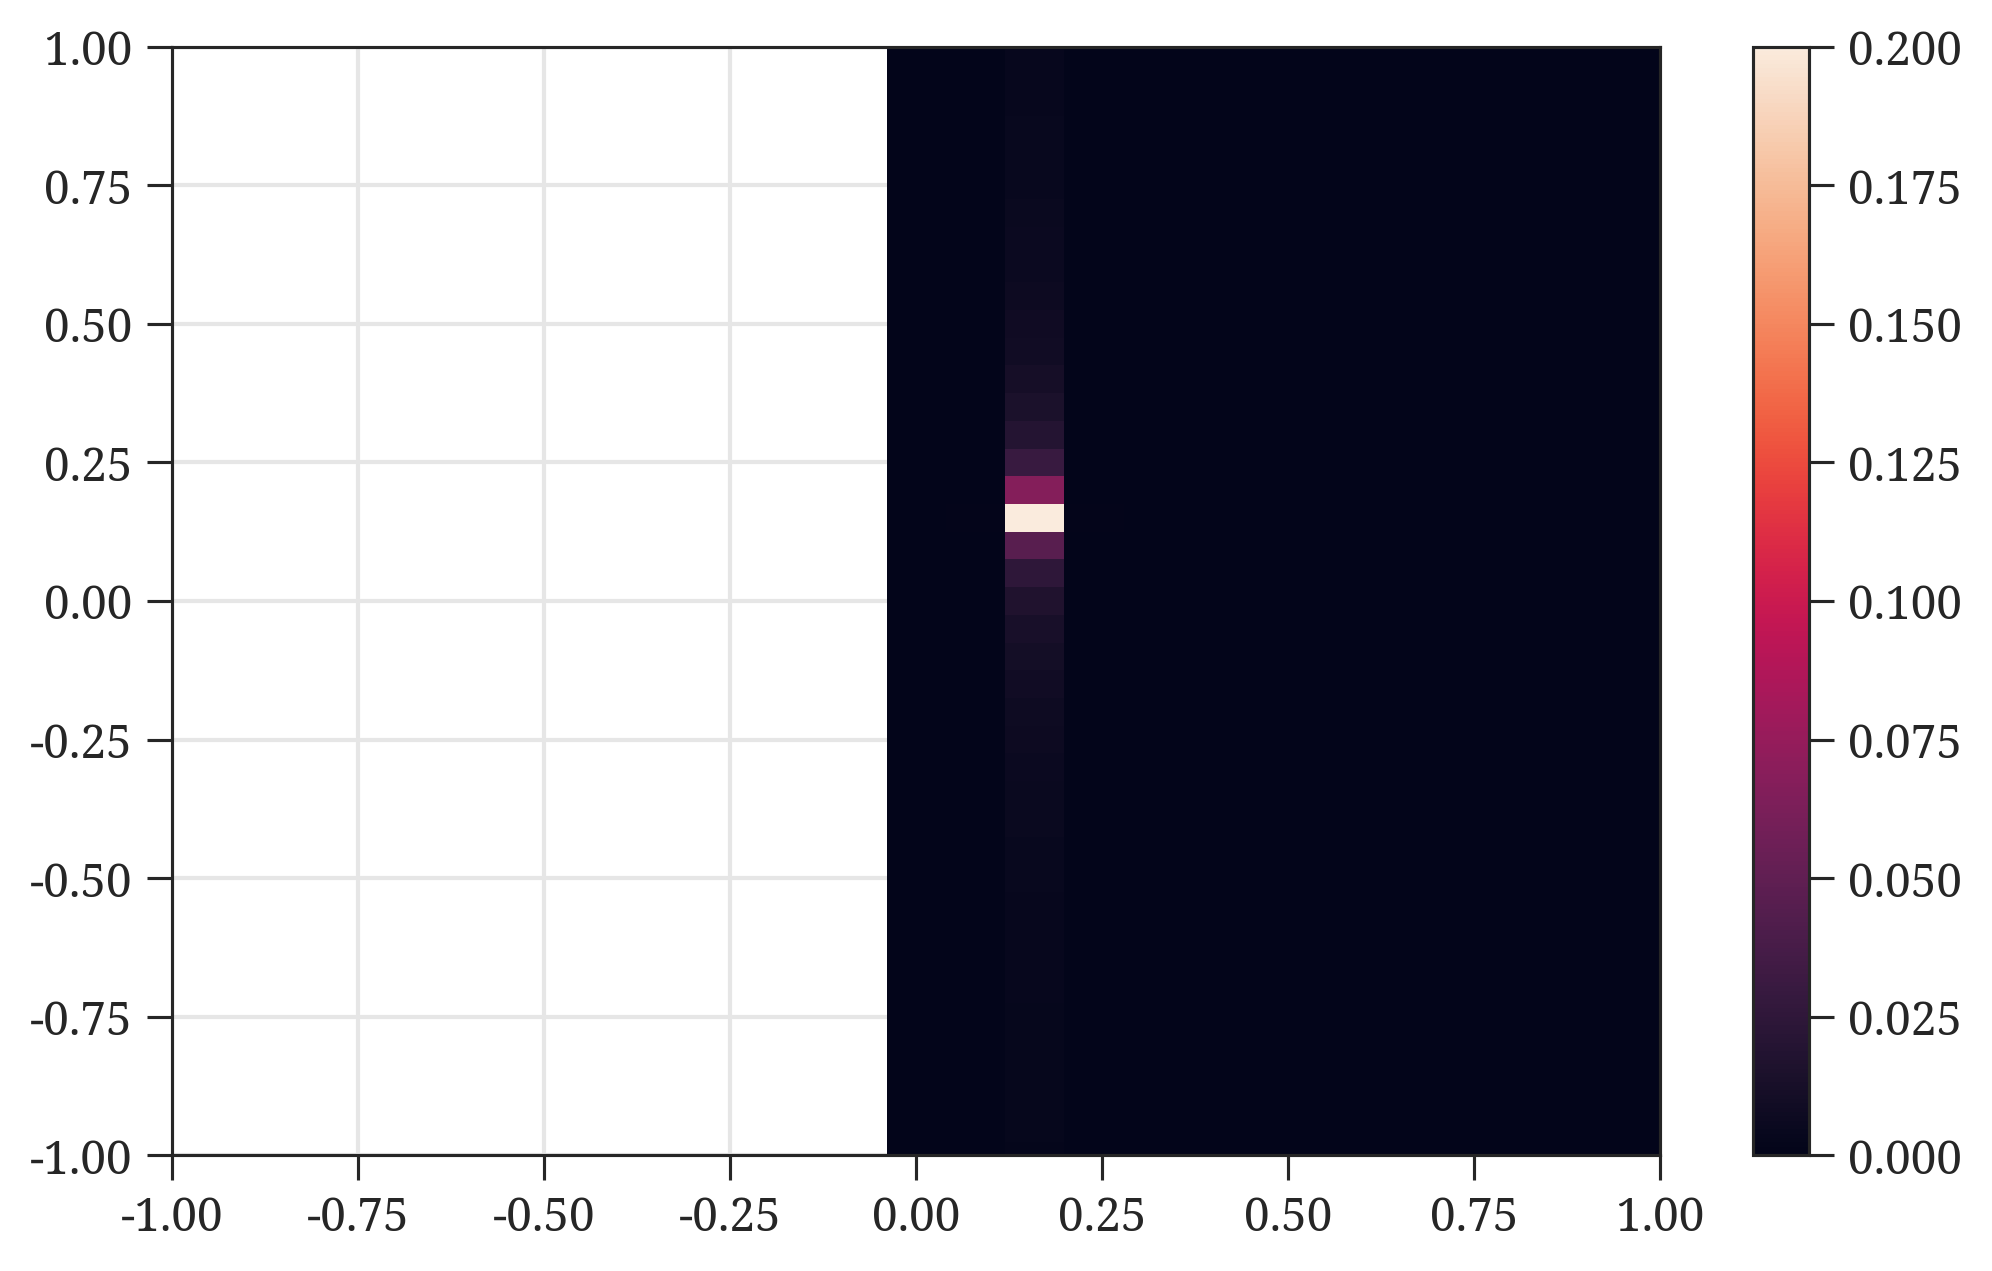

In [32]:
plt.pcolormesh(kx, kt, fftdata2)
plt.colorbar()
plt.clim(0,0.2)
plt.axis((-1,1, -1, 1))


In [80]:
np.max(fftdata2)

0.28495328586060764

In [83]:
inds = np.where(fftdata2 == np.max(fftdata2))

In [89]:
1 - kt[inds[0]] / kx[inds[1]]

array([0.05911824])

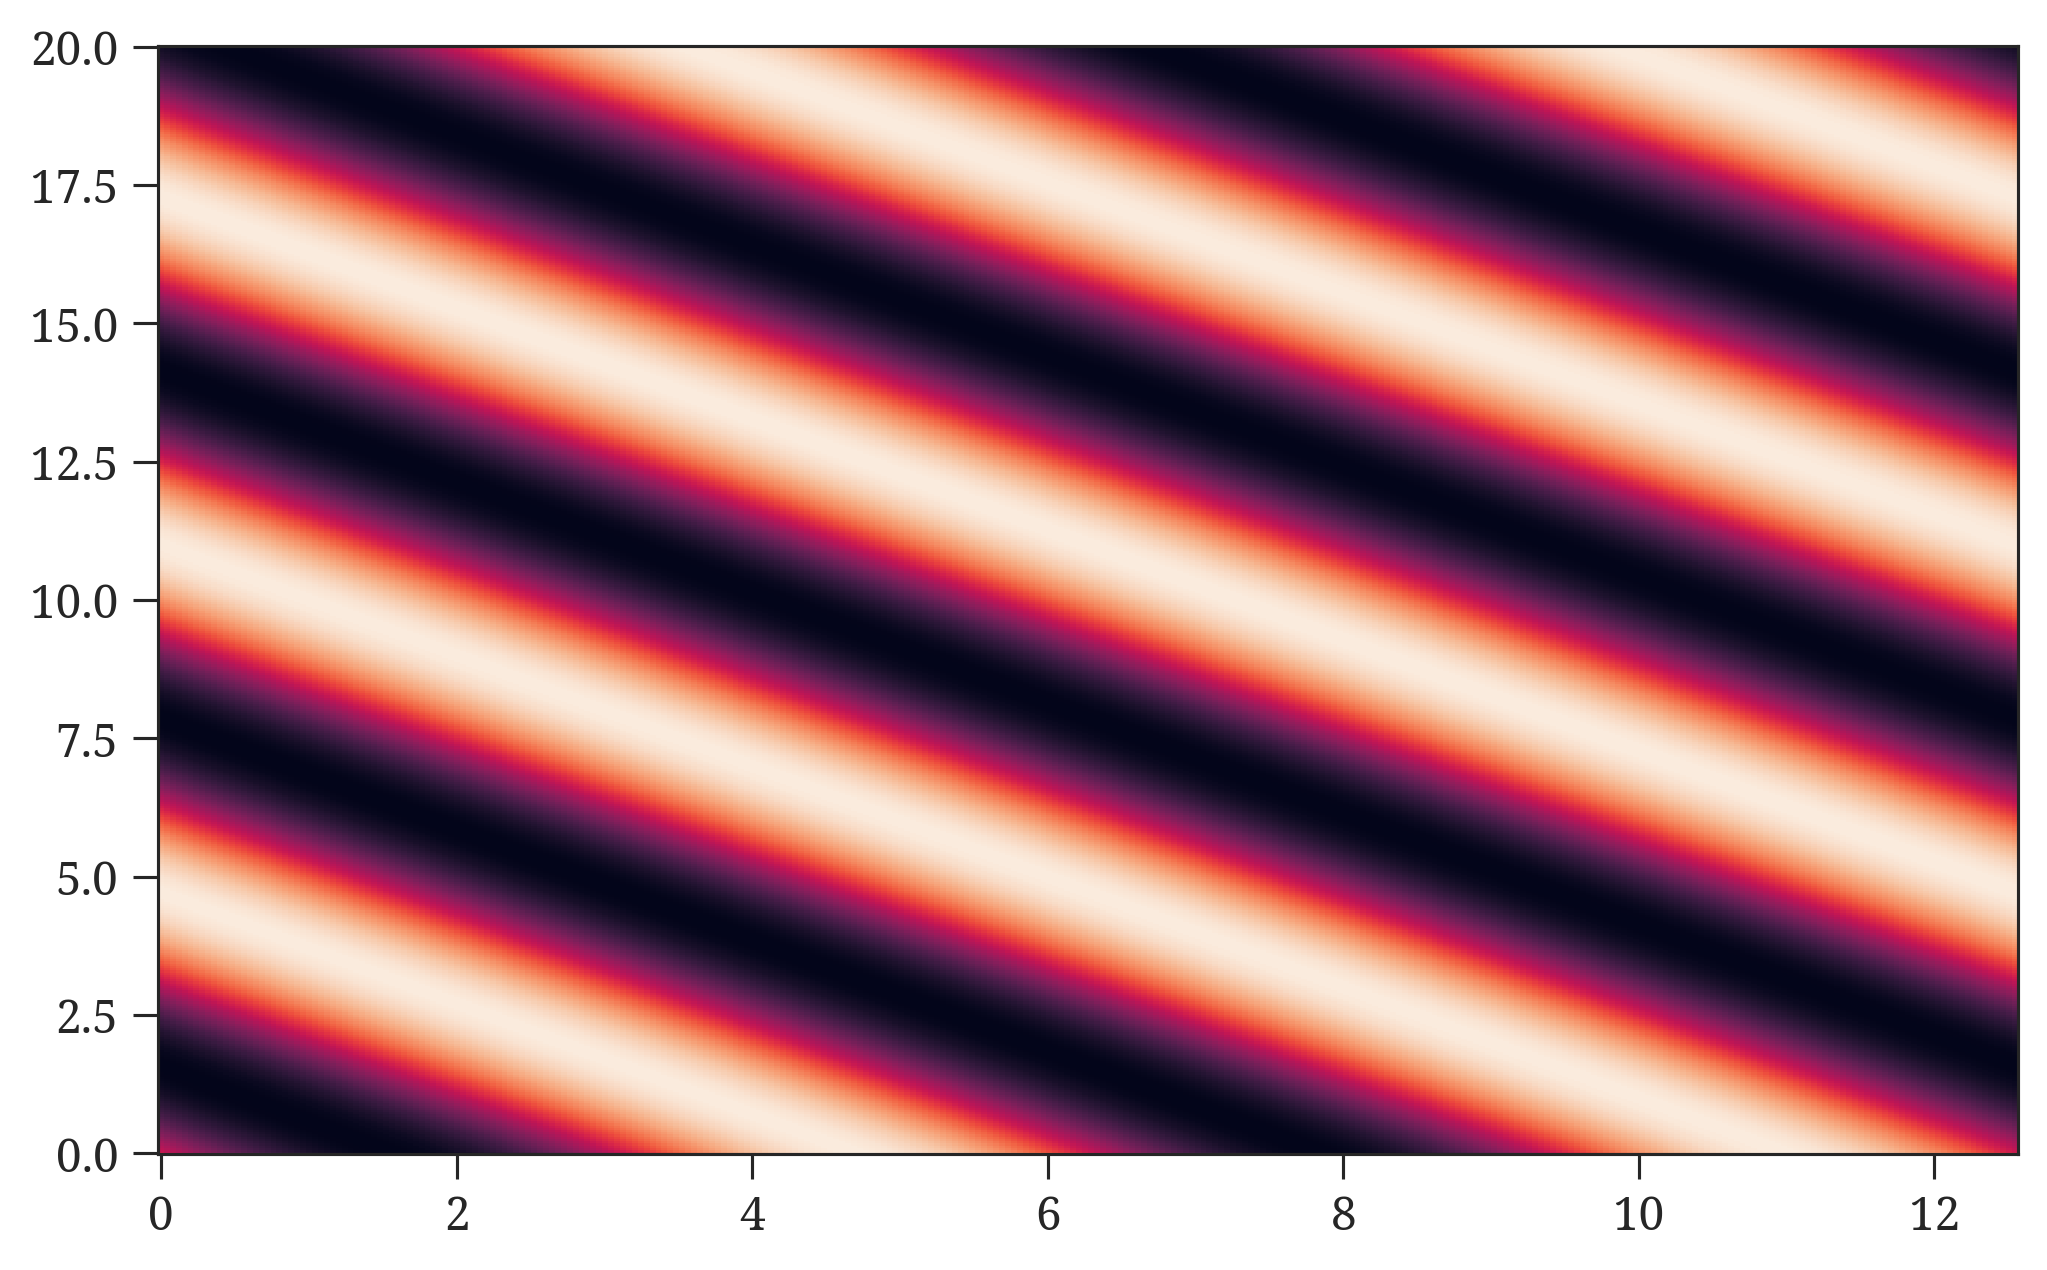

In [33]:
plt.pcolormesh(xwin, twin, diag[:,0:dx])

/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/1637233096.py:8: RuntimeWarning: divide by zero encountered in divide
  vphi_map1 = 1.0 - Kt / Kx
/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/1637233096.py:8: RuntimeWarning: invalid value encountered in divide
  vphi_map1 = 1.0 - Kt / Kx
/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/1637233096.py:10: RuntimeWarning: divide by zero encountered in divide
  vphi_map2 = 1.0 - Kt / Kx
/var/folders/1l/wxbt57_x5pd0k02tzrbzdzvh0000gn/T/ipykernel_25272/1637233096.py:10: RuntimeWarning: invalid value encountered in divide
  vphi_map2 = 1.0 - Kt / Kx


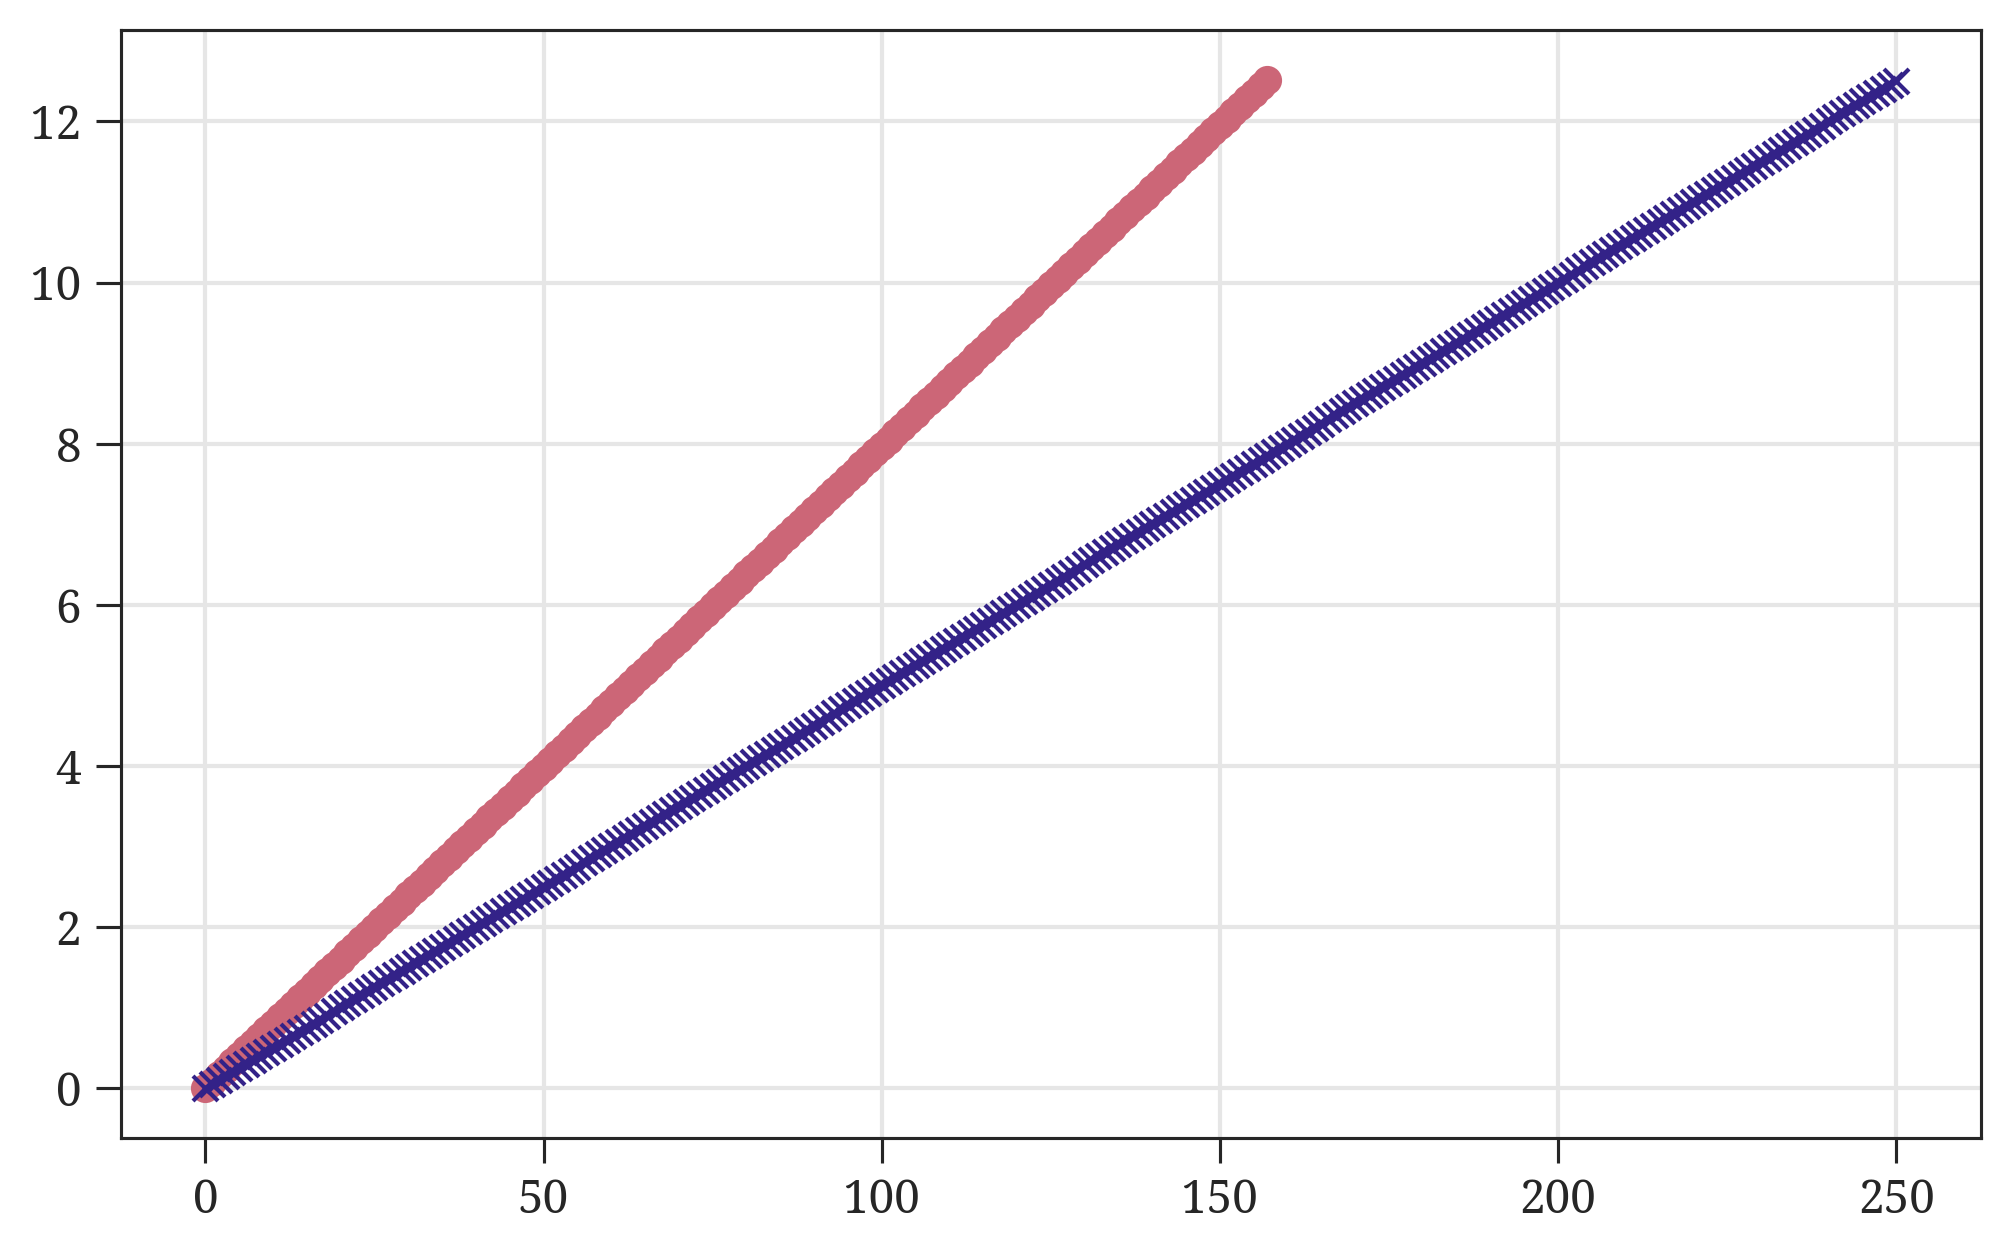

In [37]:
xwin1 = x[0:dx]
xwin2 = x

kx1 = _get_kaxis(xwin1, real=True)
kx2 = _get_kaxis(xwin2, real=True)

Kx, Kt = np.meshgrid(kx1, kt)
vphi_map1 = 1.0 - Kt / Kx
Kx, Kt = np.meshgrid(kx2, kt)
vphi_map2 = 1.0 - Kt / Kx

plt.plot(kx1, 'o')
plt.plot(kx2, 'x')
plt.show()

In [35]:
print(kx1[1]-kx1[0])
print(kx2[1]-kx2[0])

0.07971246006389776
0.05


In [36]:
print(kx1[-1])
print(kx2[-1])

12.514856230031949
12.5


In [50]:
ind1 = np.where(kx1 >= 10.0)[0][0]
kx1[ind1]

10.043769968051118

In [51]:
ind2 = np.where(kx2 >= 10.0)[0][0]
kx2[ind2]

10.0

In [52]:
vphi_map1[10,ind1]

2.194770493367688

In [53]:
vphi_map2[10,ind2]

2.2

In [54]:
fftdata = abs(np.fft.fftshift(np.fft.rfft2(diag[:,0:dx], norm='forward'), axes=0))

(0.0, 2.0)

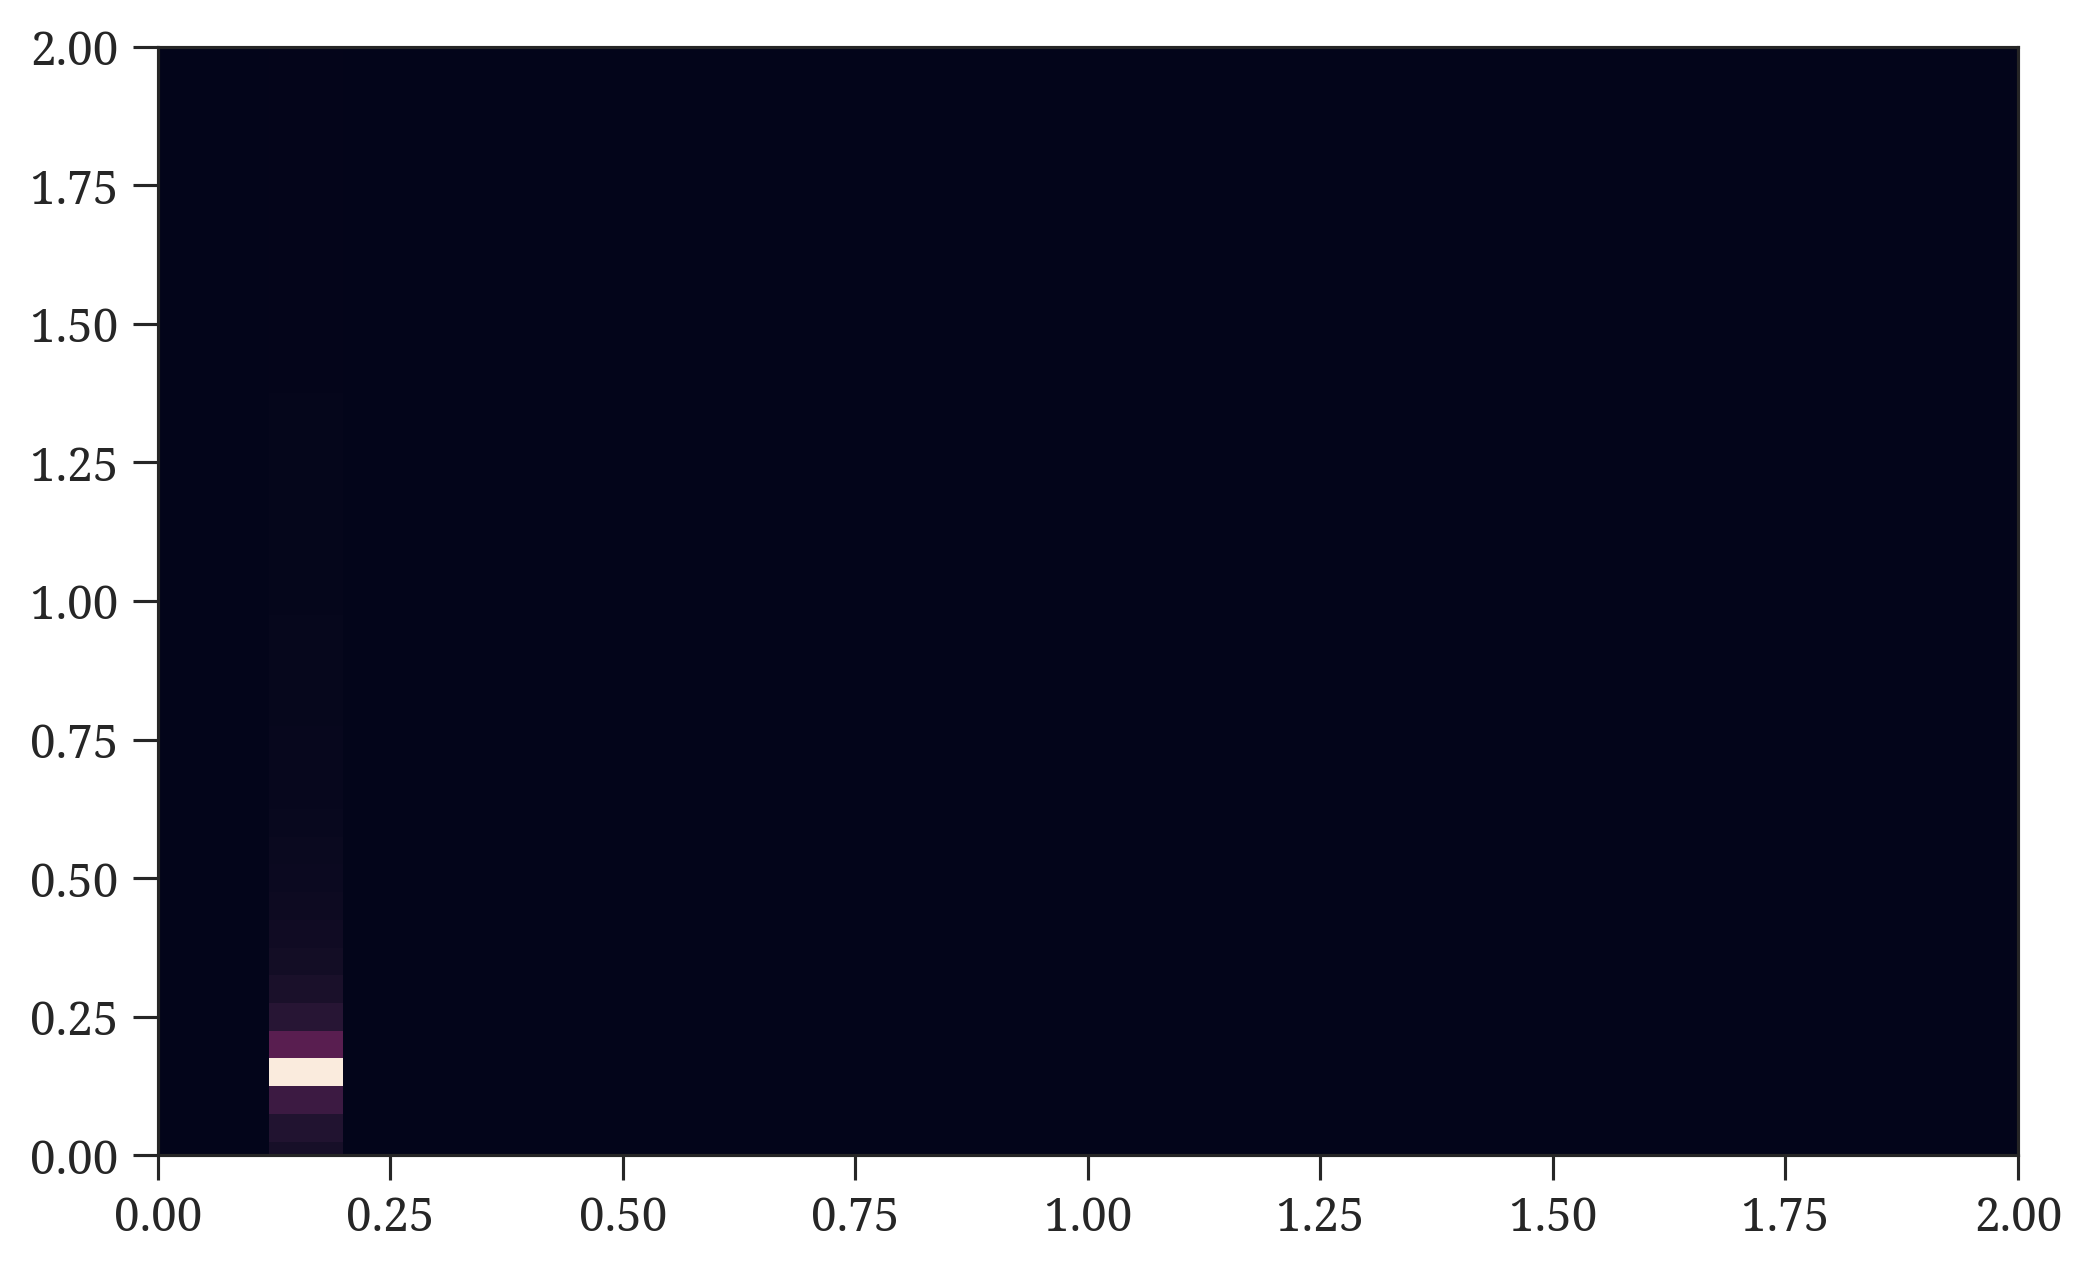

In [59]:
plt.pcolormesh(kx1, kt, fftdata)
plt.xlim(0,2)
plt.ylim(0,2)